In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

from matplotlib import pyplot as plt

uploaded = files.upload()
image_filename = list(uploaded.keys())[0]

#img = cv2.imread(image_filename)

Saving 14_phase.jpg to 14_phase.jpg


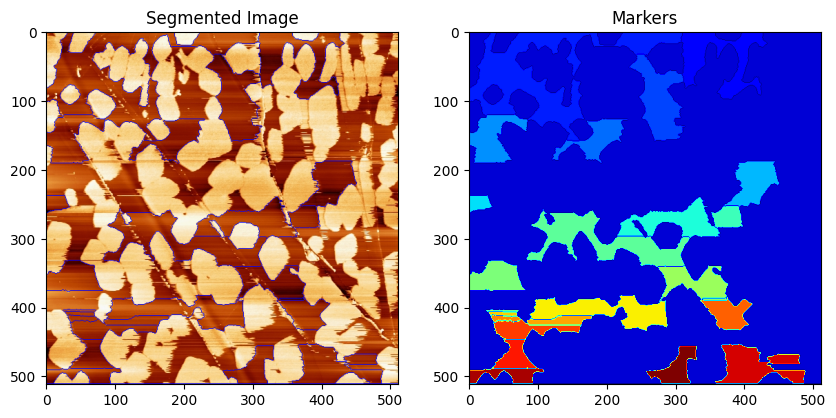

In [ ]:
# Function to apply watershed segmentation
def watershed_segmentation(image_path):
    # Load the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply threshold to get the binary image
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Remove noise
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # Sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker labeling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers + 1

    # Now, mark the region of unknown with zero
    markers[unknown == 255] = 0

    # Apply watershed
    markers = cv2.watershed(img, markers)
    img[markers == -1] = [255, 0, 0]  # Mark the boundaries in red

    return img, markers


# Apply watershed segmentation
segmented_img, markers = watershed_segmentation(image_filename)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Segmented Image')
plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Markers')
plt.imshow(markers, cmap='jet')

plt.show()


Implementation-2

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

from matplotlib import pyplot as plt

uploaded = files.upload()
image_filename = list(uploaded.keys())[0]

img = cv2.imread(image_filename)

Saving 14_phase.jpg to 14_phase.jpg


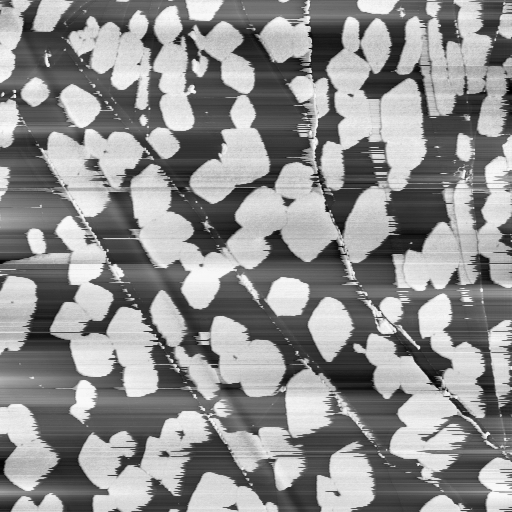

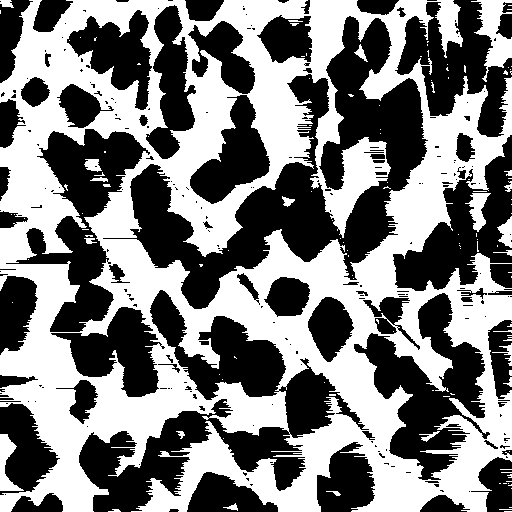

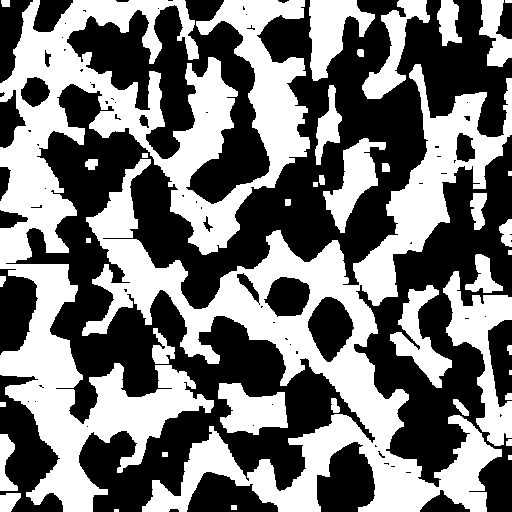

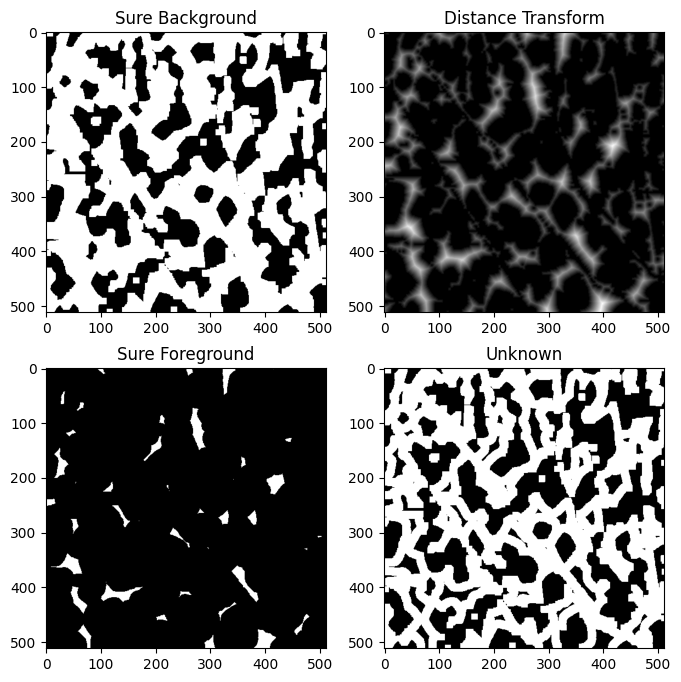

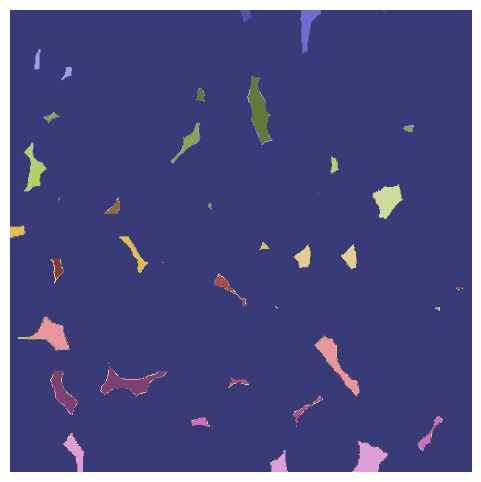

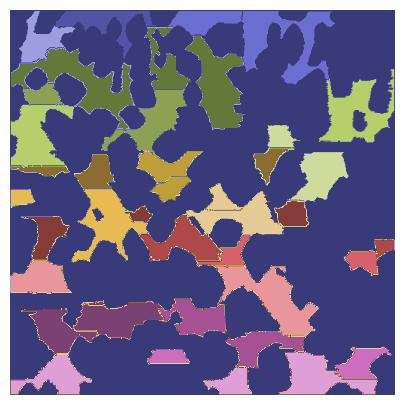

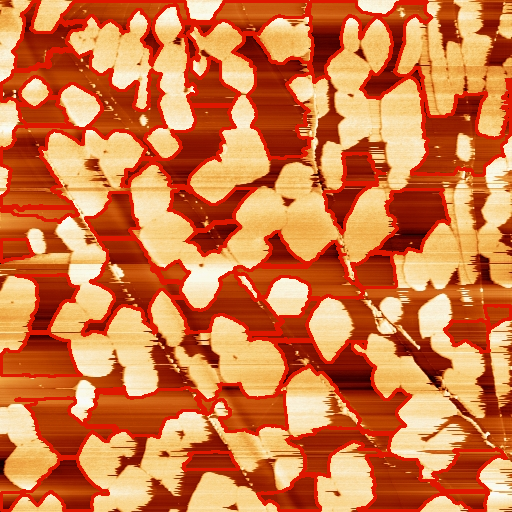

In [ ]:
def watershed_segmentation(img):

    # Image grayscale conversion
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray)

    # Threshold Processing
    ret, bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    cv2_imshow(bin_img)

    # Noise removal
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel, iterations=2)
    cv2_imshow(bin_img)

    # Create subplots with 1 row and 2 columns
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

    # Sure background area
    sure_bg = cv2.dilate(bin_img, kernel, iterations=3)
    axes[0, 0].imshow(sure_bg, cmap='gray')
    axes[0, 0].set_title('Sure Background')

    # Distance transform
    dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)
    axes[0, 1].imshow(dist, cmap='gray')
    axes[0, 1].set_title('Distance Transform')

    # Foreground area
    ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)
    sure_fg = sure_fg.astype(np.uint8)
    axes[1, 0].imshow(sure_fg, cmap='gray')
    axes[1, 0].set_title('Sure Foreground')

    # Unknown area
    unknown = cv2.subtract(sure_bg, sure_fg)
    axes[1, 1].imshow(unknown, cmap='gray')
    axes[1, 1].set_title('Unknown')

    plt.show()

    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that background is not 0, but 1
    markers += 1

    # Mark the region of unknown with zero
    markers[unknown == 255] = 0

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(markers, cmap="tab20b")
    ax.axis('off')
    plt.show()

    # Watershed Algorithm
    markers = cv2.watershed(img, markers)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(markers, cmap="tab20b")
    ax.axis('off')
    plt.show()

    labels = np.unique(markers)
    coins = []
    for label in labels[2:]:
        # Create a binary image in which only the area of the label is in the foreground
        # and the rest of the image is in the background
        target = np.where(markers == label, 255, 0).astype(np.uint8)

        # Perform contour extraction on the created binary image
        contours, hierarchy = cv2.findContours(target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        coins.append(contours[0])

    # Draw the outline
    img = cv2.drawContours(img, coins, -1, color=(0, 23, 223), thickness=2)
    cv2_imshow(img)



# Call the function
watershed_segmentation(img)


Clustering Technique

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload the AFM image
uploaded = files.upload()

# Load the image
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

Saving 16_phase.jpg to 16_phase.jpg


In [ ]:
# Reshape the image to a 2D array of pixels and normalize
pixels = img.reshape(-1, 1).astype(np.float32)

In [ ]:
# Define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters (change as needed)
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to uint8 (intensity values) and create the segmented image
centers = np.uint8(centers)
segmented_img = centers[labels.flatten()]
segmented_img = segmented_img.reshape(img.shape)

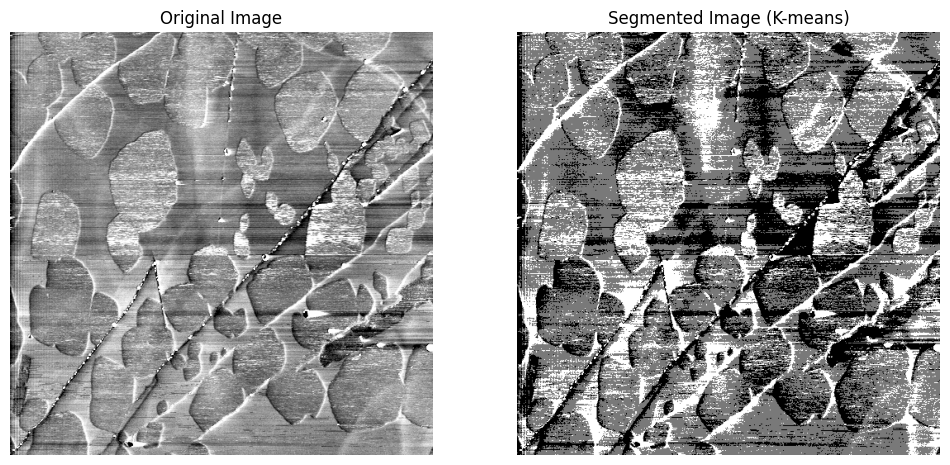

In [ ]:
# Plot the original and segmented images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image (K-means)')
plt.imshow(segmented_img, cmap='gray')
plt.axis('off')

plt.show()